<a href="https://colab.research.google.com/gist/labra/79e624b0534b4c7e2f869e28266be3c5/short-introduction-to-rudof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short introduction to Rudof

This document contains a short introduction to [rudof](https://rudof-project.github.io/), an RDF data shapes library. Although the library is implemented in Rust, it contains Python bindings and this document can also be seen as a short demo of those bindings.

## Install and initialize rudof

In [ ]:
!pip install pyrudof

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.9 MB/s eta 0:00:00


In [ ]:
from pyrudof import Rudof, RudofConfig

In [ ]:
rudof = Rudof(RudofConfig())

## Validate using SHACL

In [ ]:
rudof.read_data_str("""
prefix : <http://example.org/>
prefix sh:     <http://www.w3.org/ns/shacl#>
prefix xsd:    <http://www.w3.org/2001/XMLSchema#>

:Person a sh:NodeShape;
   sh:targetNode :ok, :ko ;
   sh:property [
    sh:path     :name ;
    sh:minCount 1;
    sh:maxCount 1;
    sh:datatype xsd:string ;
  ] .
""")

In [ ]:
rudof.read_data_str("""
prefix : <http://example.org/>

:ok :name "alice" .
:ko :name 1 .
""")

In [ ]:
result = rudof.validate_shacl()

In [ ]:
print(result.show())

1 errors found
Focus node :ko, Component: sh:datatype, severity: sh:Violation



The next command is just to clean the RDF data for the next examples.

In [ ]:
rudof.reset_all()

## Validate using ShEx

In [ ]:
rudof.read_shex_str("""
prefix : <http://example.org/>
prefix xsd:    <http://www.w3.org/2001/XMLSchema#>

:Person {
 :name xsd:string
}
""")


In [ ]:
rudof.read_data_str("""
prefix : <http://example.org/>

:ok :name "alice" .
:ko :name 1 .
""")

In [ ]:
rudof.read_shapemap_str(":ok@:Person, :ko@:Person")

Once the ShEx schema and the Shapemap have been added to `rudof`, it is possible to validate the current RDF data with the `validate_shex()` method:

In [ ]:
result = rudof.validate_shex()

`validate_shex()` returns a `ResultShapeMap` object which contains a `show()` method to show the results of the validation:

In [ ]:
print(result.show())

:ko@<http://example.org/Person> -> Fail, reason: Error #Datatype error: Datatype expected http://www.w3.org/2001/XMLSchema#string but found http://www.w3.org/2001/XMLSchema#integer for literal with lexical form 1: 0
:ok@<http://example.org/Person> -> OK, reason: Reason #Shape passed. Node http://example.org/ok, shape: :Person: 0



We reset the status of the `ShEx` schema, the `Shapemap` and the current `RDF data` for the next section.

In [ ]:
rudof.reset_all()

## Converting ShEx to UML

`rudof` can be used to convert ShEx to diagrams in UML-like style. The converter generates a [PlantUML](https://plantuml.com/) string which can be written to a file and converted to an image using the PlantUML tool.

In [ ]:
from pyrudof import UmlGenerationMode

In [ ]:
rudof.read_shex_str("""
prefix : <http://example.org/>
prefix xsd:    <http://www.w3.org/2001/XMLSchema#>

:Person {
 :name xsd:string  ;
 :knows @:Person * ;
 :worksFor @:Company
}

:Company {
  :name xsd:string     ;
  :employee @:Person * ;
}
""")

In [ ]:
plant_uml = rudof.shex2plantuml(UmlGenerationMode())

Now we install the PlantUML tools necessary to process the generated `plant_uml`

In [ ]:
! pip install plantuml

In [ ]:
! pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


In [ ]:
f= open("out.puml","w+")

In [ ]:
f.write(plant_uml)

535

In [ ]:
f.close()

In [ ]:
!python -m plantuml out.puml

[{'filename': 'out.puml', 'gen_success': True}]


In [ ]:
from IPython.display import Image

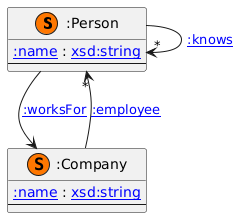

In [ ]:
Image(f"out.png")

In [ ]:
rudof.reset_all()

## Converting DCTAP to ShEx

Rudof can be used to convert [DCTAP](https://www.dublincore.org/specifications/dctap/) files to ShEx.

DCTAP can be used to represent shapes using a tabular representation using CSV or an spreadsheet format like XLSX. As an example, the following CSV data:


In [ ]:
dctap_str = """shapeId,propertyId,Mandatory,Repeatable,valueDatatype,valueShape
Person,name,true,false,xsd:string,
,birthdate,false,false,xsd:date,
,worksFor,false,true,,Company
Company,name,true,false,xsd:string,
,employee,false,true,,Person
"""

In [ ]:
rudof.read_dctap_str(dctap_str)

In [ ]:
dctap = rudof.get_dctap()

In [ ]:
print(dctap)

Shape(Person)  
 name xsd:string 
 birthdate xsd:date ?
 worksFor @Company *
Shape(Company)  
 name xsd:string 
 employee @Person *



It is possible to convert the DCTAP obtained to ShEx

In [ ]:
rudof.dctap2shex()


In [ ]:
from pyrudof import ShExFormatter

In [ ]:
result = rudof.serialize_shex(ShExFormatter())


In [ ]:
print(result)

prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix : <http://example.org/>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dc: <http://purl.org/dc/elements/1.1/>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix sh: <http://www.w3.org/ns/shacl#>
:Person { :name xsd:string; :birthdate xsd:date ?; :worksFor @:Company * }
:Company { :name xsd:string; :employee @:Person * }
